По данным опроса, 75% работников ресторанов утверждают, что испытывают на работе существенный стресс, оказывающий негативное влияние на их личную жизнь. Крупная ресторанная сеть опрашивает 100 своих работников, чтобы выяснить, отличается ли уровень стресса работников в их ресторанах от среднего. 67 из 100 работников отметили высокий уровень стресса. 

Посчитайте достигаемый уровень значимости, округлите ответ до четырёх знаков после десятичной точки.

In [3]:
import numpy as np
from scipy import stats
from matplotlib import pyplot as plt
%matplotlib inline

Итак, 0 гипотеза $H_0$ - уровень стресса работников не отличается. Это значит, что для этой гипотезы будут важны отклонения как в 1, так и в другую сторону, поэтому нужно смотреть "two-sided"

По сути стоит сразу заметить, что это биномиальное распределение с вероятностью "успеха" p = 0.75 и количеством экспериментов n = 100.

In [2]:
p = 0.75
n = 100
F_H0 = stats.binom(n, p)

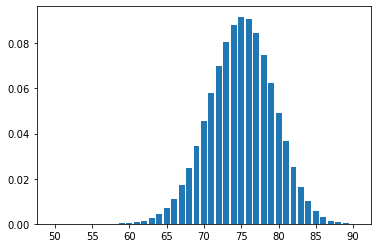

In [6]:
x = np.linspace(50, 90, 41)
plt.bar(x, F_H0.pmf(x))
#plt.xlim(50, 91)
plt.show()

In [42]:
stats.binom_test(67, n, p, alternative='two-sided')

0.08222258891386608

The Wage Tract — заповедник в округе Тома, Джорджия, США, деревья в котором не затронуты деятельностью человека со времён первых поселенцев. Для участка заповедника размером 200х200 м имеется информация о координатах сосен (sn — координата в направлении север-юг, we — в направлении запад-восток, обе от 0 до 200).
Проверим, можно ли пространственное распределение сосен считать равномерным, или они растут кластерами.

Загрузите данные, поделите участок на 5х5 одинаковых квадратов размера 40x40 м, посчитайте количество сосен в каждом квадрате (чтобы получить такой же результат, как у нас, используйте функцию scipy.stats.binned_statistic_2d).

Если сосны действительно растут равномерно, какое среднее ожидаемое количество сосен в каждом квадрате? В правильном ответе два знака после десятичной точки.

In [11]:
import pandas as pd

In [12]:
data = pd.read_csv('pines.txt', delimiter='\t')

In [15]:
data

,sn,we
0,200.0,8.8
1,199.3,10.0
2,193.6,22.4
3,167.7,35.6
4,183.9,45.4
...,...,...
579,169.1,160.0
580,162.5,157.3
581,156.7,155.3
582,154.1,150.8


In [22]:
bins = np.linspace(0,200,6)
bins

array([  0.,  40.,  80., 120., 160., 200.])

In [26]:
res = stats.binned_statistic_2d(data.sn.values, data.we.values, 0, 'count', bins=[bins,bins])

In [28]:
res.statistic.mean()

23.36

Чтобы сравнить распределение сосен с равномерным, посчитайте значение статистики хи-квадрат для полученных 5х5 квадратов. Округлите ответ до двух знаков после десятичной точки.

In [36]:
number = data.shape[0]

In [37]:
expected_counts = np.full((5,5),number/25)

In [38]:
expected_counts

array([[23.36, 23.36, 23.36, 23.36, 23.36],
       [23.36, 23.36, 23.36, 23.36, 23.36],
       [23.36, 23.36, 23.36, 23.36, 23.36],
       [23.36, 23.36, 23.36, 23.36, 23.36],
       [23.36, 23.36, 23.36, 23.36, 23.36]])

In [39]:
stats.chisquare(res.statistic.flatten(), expected_counts.flatten(),ddof=1)

Power_divergenceResult(statistic=150.58904109589042, pvalue=9.87806178820889e-21)

Насколько велико это значение? Если нулевая гипотеза справедлива, с какой вероятностью его можно было получить случайно? 

Нулевое распределение статистики — хи-квадрат с 25-1=2425−1=24 степенями свободы (поскольку у равномерного распределения, с которым мы сравниваем данные, нет ни одного оцениваемого по выборке параметра, число степеней свободы K-1K−1, где KK — количество интервалов).

Посчитайте достигаемый уровень значимости.  

Если вы используете функцию scipy.stats.chi2.cdf, в качестве значения параметра df нужно взять 24 (это число степеней свободы); если функцию scipy.stats.chisquare  — параметр ddof нужно брать равным 0 (это как раз количество параметров теоретического распределения, оцениваемых по выборке).

Отвергается ли гипотеза равномерности на уровне значимости 0.05?

In [40]:
stats.chisquare(res.statistic.flatten(), expected_counts.flatten(),ddof=0)

Power_divergenceResult(statistic=150.58904109589042, pvalue=2.574669774967279e-20)